In [1]:
%pwd

'/home/david/Documents/dsi/repos/nlp-case-study/notebooks'

In [2]:
%cd ..

/home/david/Documents/dsi/repos/nlp-case-study


In [3]:
import json # to work with json file format
from bs4 import BeautifulSoup # to parse html
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def get_records(file_path='data/ufo_first100records.json'):
    # TODO: this doesn't scale well and doesn't help with looking at the data.
    #       Possible solutions: load into pandas dataframe or mongodb, maybe both.
    ufo_first100_file_path = 'data/ufo_first100records.json'
    records = []    

    with open(file_path) as f:
        for i in f:
            records.append(json.loads(i))
    return records

In [5]:
#soup = BeautifulSoup('data/ufo_first100records.json', "html")

In [6]:
# ufo_first100_file_path = 'data/ufo_first100records.json'
# ufo_first100records = get_records(ufo_first100_file_path)


# #print(ufo_first100records[0])

In [7]:
# #print(ufo_first100records[0])
# # #soup = 
# # soup.prettify(ufo_first100records[0])

# for key, value in ufo_first100records[0].values:
#     print(key)
#     print(value)

In [8]:
def get_text(records):
    text_accum = []
    for record in records:
        soup = BeautifulSoup(record['html'], "html.parser")
        texts = soup.find_all('td')
        #if len(texts) > 1:
        data = texts[1].text
        text_accum.append(data)
    return text_accum


def get_header(records):
    text_accum = []
    for record in records:
        soup = BeautifulSoup(record['html'], "html.parser")
        texts = soup.find_all('td')
        #if len(texts) > 1:
        data = texts[0].text
        text_accum.append(data)
    return text_accum

In [9]:
# text_body = get_text(ufo_first100records)
# text_header = get_header(ufo_first100records)


# # print(text_header[1])
# # print('\n\n\n\n\n\n')
# # print(text_body[1])


# for header in text_header:
#     print(header)
#     print('\n\n\n\n')
# # for t in text:
# #     print(len(t))

In [10]:
# import re
# #text_header
# #text_header = texts[0].text
# date = re.search(r"Occurred : (.*?)  ", text_header[0]).group(1)
# print(date)

In [11]:
# text processing steps:
#lowercase all text and strip out punctuation
#remove stop words
#lemmatize words
#turn words into a tf-idf matrix

In [12]:
# import re
# #records = []
# headers = get_header(ufo_first100records) 

# def headers_split(header):
#     occured = re.search(r"Occurred : (.*?)  ", data).group(1)
#     reported = re.search(r"Reported: (.*?)Posted", data).group(1)
#     posted = re.search(r"Posted: (.*?)Location", data).group(1)
#     location = re.search(r"Location: (.*?)Shape", data).group(1)
#     return occured, reported, posted, location

# def data_split(records):
#     occurs, reporteds, posteds, locations, texts = [],[],[],[],[]
#     for i in range(len(records)):
#         soup = BeautifulSoup(records[i]['html'], 'html.parser')
#         lst_td = soup.find_all('td')
#         header = lst_td[0].text
#         occured, reported, posted, location = headers_split(header)
#         text = lst_td[1].text
#         occurs.append(occured)
#         reporteds.append(reported)
#         posteds.append(posted)
#         locations.append(location)
#         texts.append(text)
#     pd_dict = {'occured': occurs, 'reported' : reporteds, 
#         'posted' : posteds, 'location' : locations, 'text' : texts}
#     return pd.DataFrame(pd_dict)

# data_split(headers)

In [13]:
def create_scatter_plot(x_values, y_values, x_label, y_label, title, filename):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    ax.scatter(x_values, y_values)
    ax.set_title(title, fontsize=19)
    ax.set_xlabel(x_label, fontsize=17)
    ax.set_ylabel(y_label, fontsize=17)
    plt.savefig(f'images/{filename}.png')
    plt.close()

def create_line_plot(x_values, y_values, x_label, y_label, title, filename):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    ax.plot(x_values, y_values)
    ax.set_title(title, fontsize=19)
    ax.set_xlabel(x_label, fontsize=17)
    ax.set_ylabel(y_label, fontsize=17)
    plt.savefig(f'images/{filename}.png')
    plt.close()  
    
def create_histogram(x_values, num_bins, x_label, title, filename):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    ax.hist(x_values, num_bins)
    ax.set_title(title, fontsize=19)
    ax.set_xlabel(x_label, fontsize=17)
    plt.savefig(f'images/{filename}.png')
    plt.close()
    
def display_df(df, max_rows=10, max_columns=None):
    """
    Display the dataframe
    """
    with pd.option_context('display.max_rows', max_rows, 'display.max_columns', max_columns): 
         display(df)


In [14]:
def print_markdown_table(df):
    """
    Print a table that can be rendered in a markdown file viewer
    """
    markdown_table = df.head(5)\
                        .to_markdown()\
                        .replace(' ', '')
    print(markdown_table)

In [15]:
import src.pipeline as pipe

In [16]:
full_data_fp = 'data/ufodata.json'
df = pipe.get_df(full_data_fp)

#df = pipe.get_df()

#df[['city', 'state']] = df['location'].str.split(", ", expand = True)

display_df(df, max_rows=10, max_columns=None)

#display_df(df['location'], max_rows=100, max_columns=None)



# sightings_count.head()# .size()

ValueError: Columns must be same length as key

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136419 entries, 0 to 136418
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   occured   134004 non-null  object
 1   reported  136332 non-null  object
 2   posted    136332 non-null  object
 3   location  136332 non-null  object
 4   shape     136332 non-null  object
 5   duration  136332 non-null  object
 6   city      136419 non-null  object
 7   state     136419 non-null  object
 8   text      136419 non-null  object
dtypes: object(9)
memory usage: 9.4+ MB


In [19]:
sightings_state_counts = df.groupby(by='state').size().reset_index(name='counts')

display_df(sightings_state_counts, max_rows=10, max_columns=None)

,state,counts
0,,8618
1,,87
2,10 Milemarker 235,1
3,20-30 miles before),1
4,Eastern Cape) (South Africa),1
...,...,...
785,west of),1
786,westbound on I-90),1
787,westbound),3
788,while camping),1


In [ ]:
# frames = [df, sightings_state_counts]

# df_with_counts = pd.concat(frames, axis=0, join='outer')


# display_df(df_with_counts, max_rows=136, max_columns=None)

In [20]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
fp_cb_2018_us_state_500k = 'data/cb_2018_us_state/cb_2018_us_state_500k.shp'
usa = gpd.read_file(fp_cb_2018_us_state_500k)
usa.rename(columns={'STUSPS': 'state'}, inplace=True)
display_df(usa, max_rows=10, max_columns=None)

,STATEFP,STATENS,AFFGEOID,GEOID,state,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
...,...,...,...,...,...,...,...,...,...,...
51,38,01779797,0400000US38,38,ND,North Dakota,00,178707534813,4403267548,"POLYGON ((-104.04868 48.86378, -104.04865 48.8..."
52,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
53,18,00448508,0400000US18,18,IN,Indiana,00,92789302676,1538002829,"POLYGON ((-88.09776 37.90403, -88.09448 37.905..."
54,27,00662849,0400000US27,27,MN,Minnesota,00,206228939448,18945217189,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 ..."


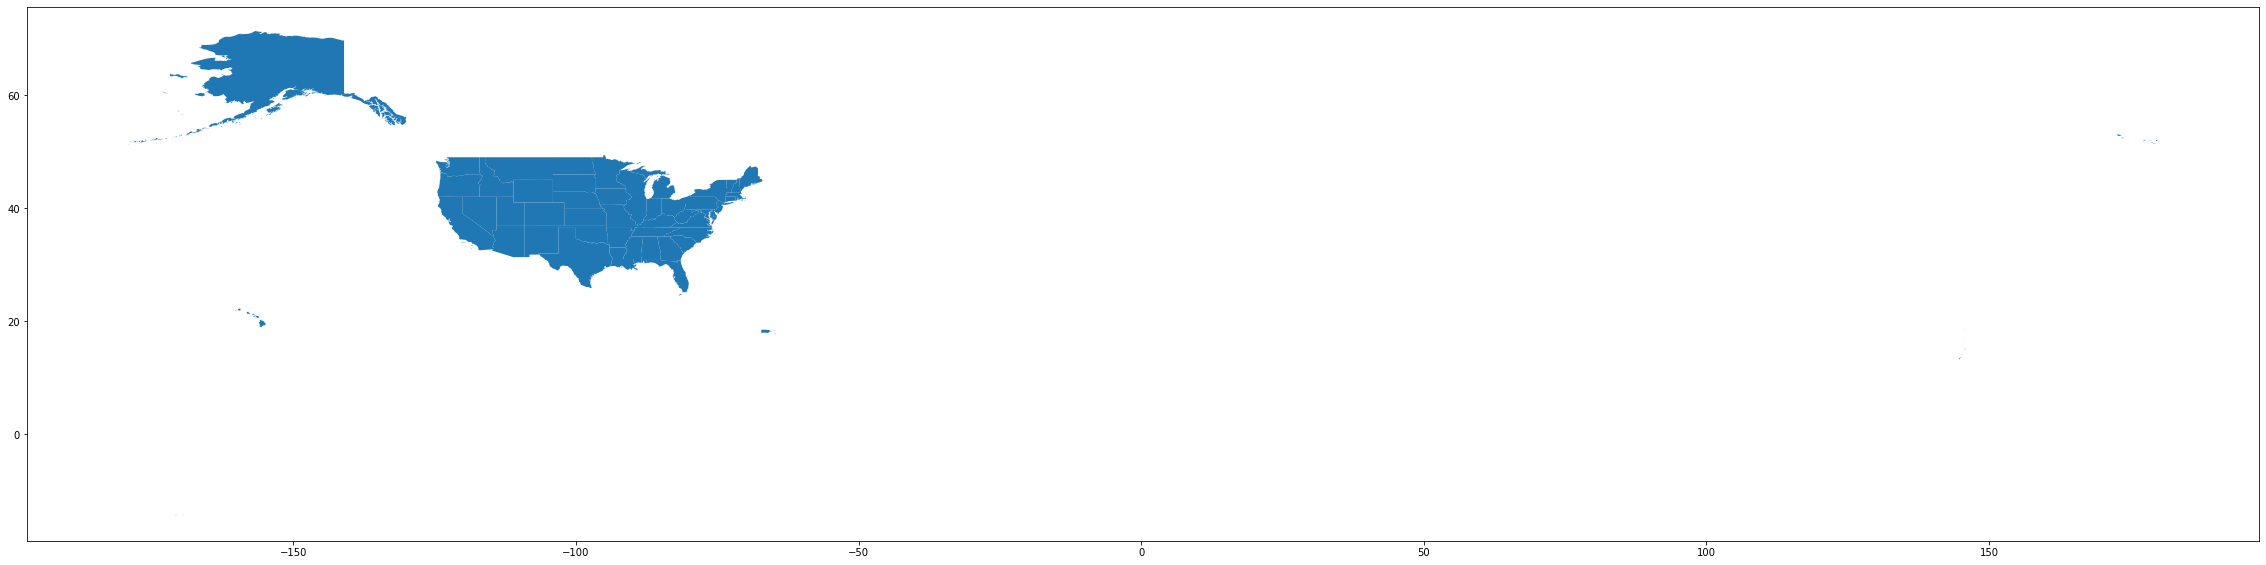

In [22]:
usa.plot(figsize=(40,40))

In [ ]:
# # Plot by GDP per capta
# world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
# world.plot(column='gdp_per_cap');

In [23]:
joined = usa.set_index('state').join(other=sightings_state_counts.set_index('state'), on='state')
joined.counts = joined.counts.fillna(0)
display_df(joined, max_rows=10, max_columns=None)

,STATEFP,STATENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,counts
state,,,,,,,,,,
MS,28,01779790,0400000US28,28,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",731.0
NC,37,01027616,0400000US37,37,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",3505.0
OK,40,01102857,0400000US40,40,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",1325.0
VA,51,01779803,0400000US51,51,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",2482.0
WV,54,01779805,0400000US54,54,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",852.0
...,...,...,...,...,...,...,...,...,...,...
ND,38,01779797,0400000US38,38,North Dakota,00,178707534813,4403267548,"POLYGON ((-104.04868 48.86378, -104.04865 48.8...",231.0
AR,05,00068085,0400000US05,05,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499...",1009.0
IN,18,00448508,0400000US18,18,Indiana,00,92789302676,1538002829,"POLYGON ((-88.09776 37.90403, -88.09448 37.905...",2202.0


[]

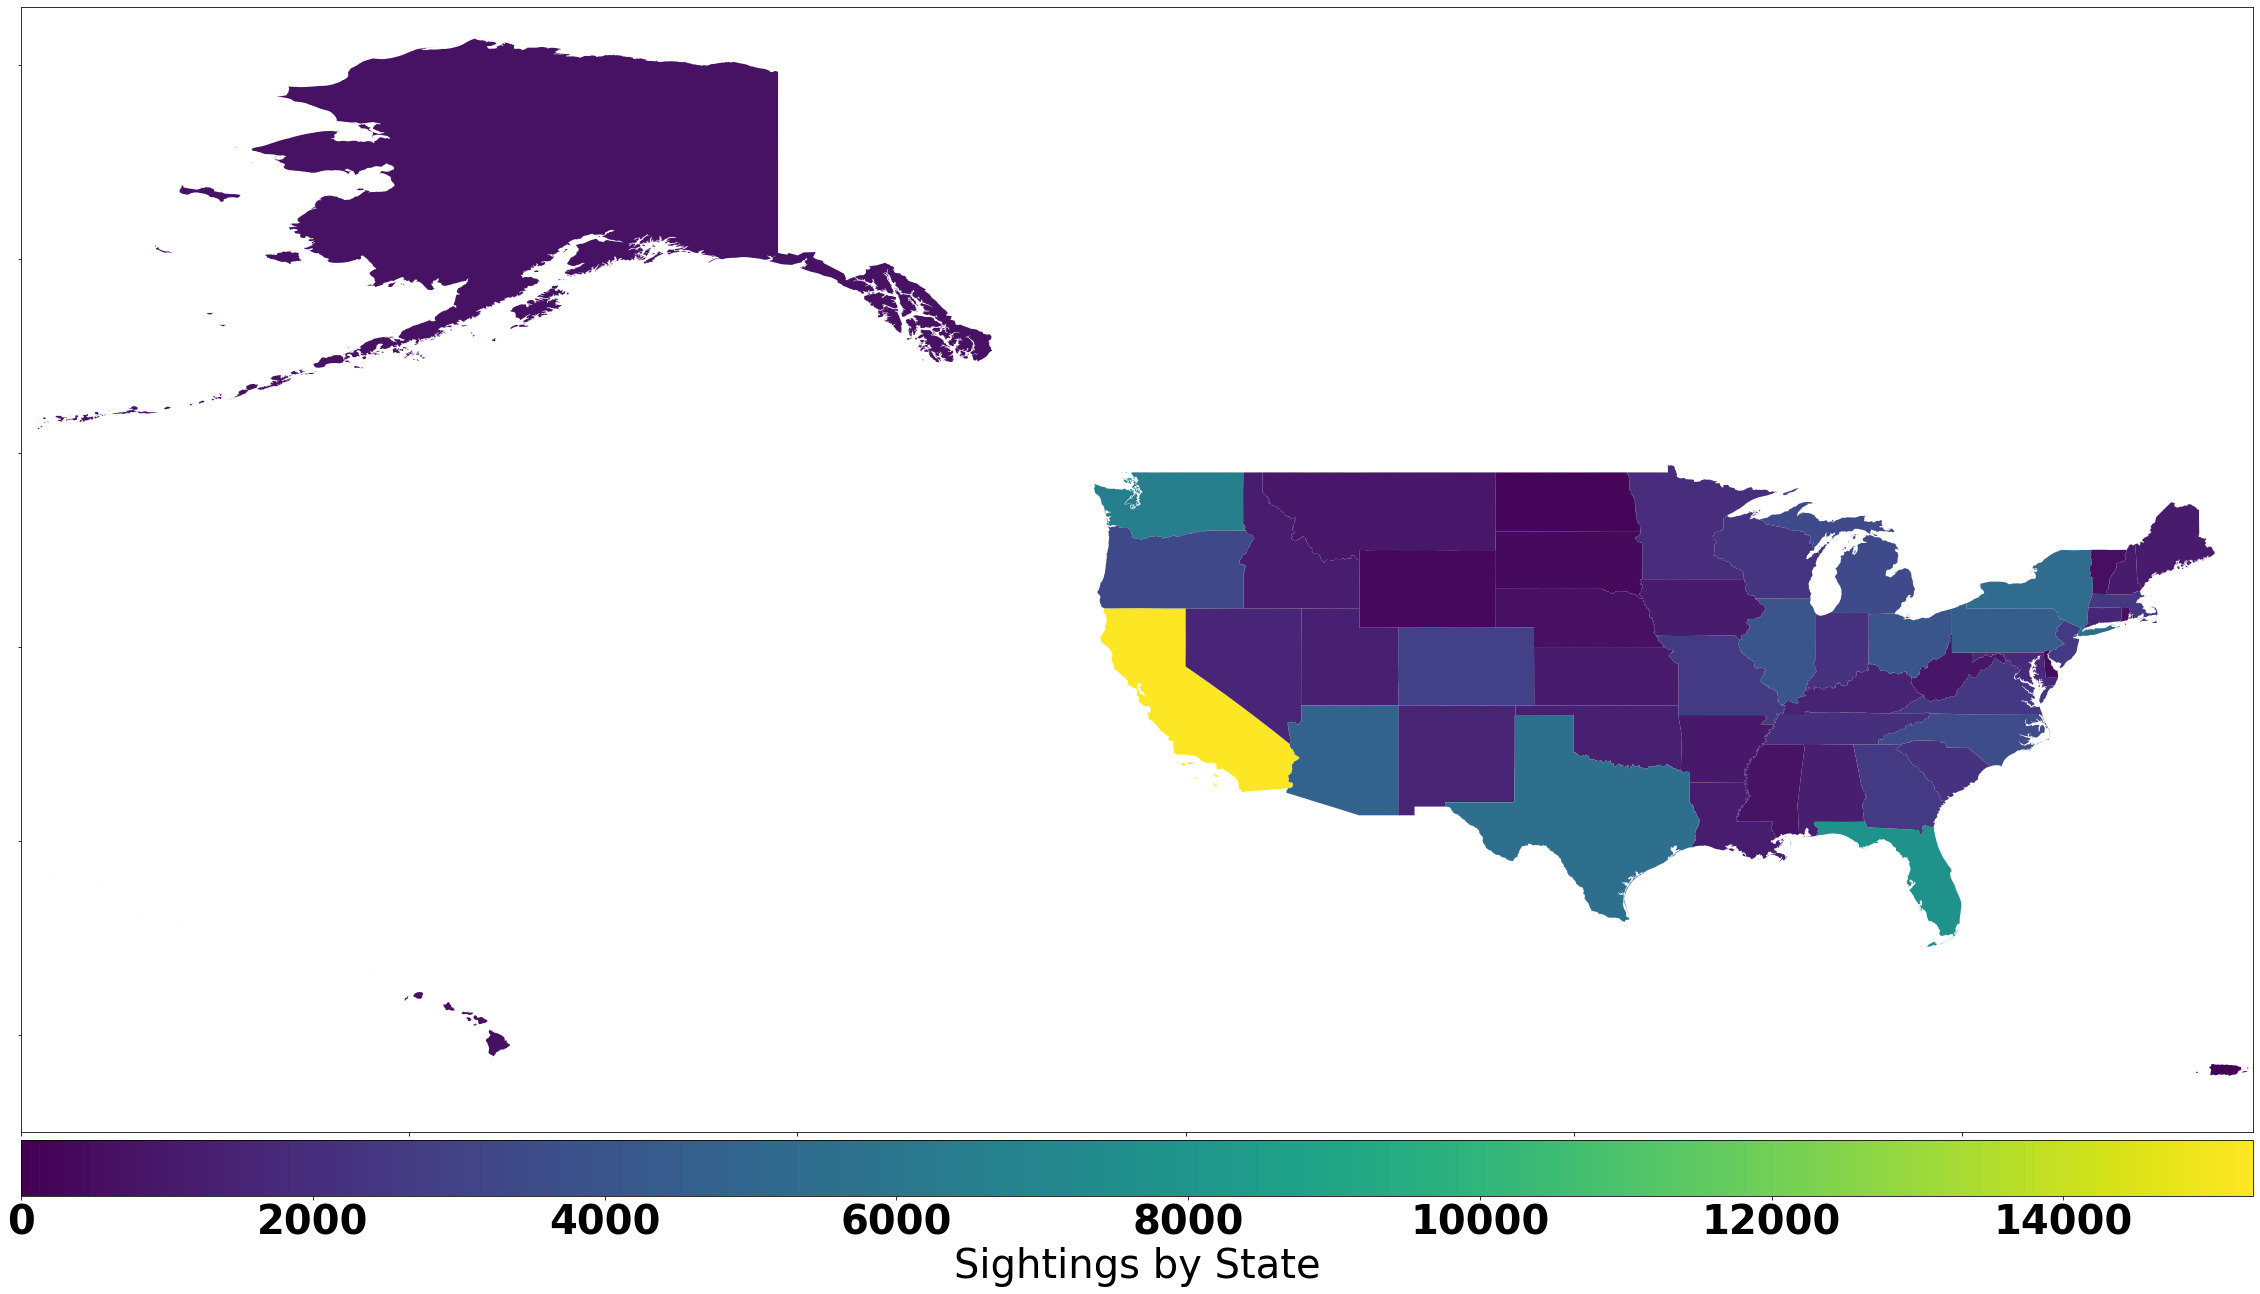

In [45]:
import matplotlib as mpl
font = {'family' : 'normal',
        'size'   : 40}

mpl.rc('font', **font)

from mpl_toolkits.axes_grid1 import make_axes_locatable
#usa.plot(column='count', figsize=(40,40))



fig, ax = plt.subplots(figsize=(40,40))


#ax.xaxis.set_major_formatter(plt.NullFormatter())

#ax.margins(x=0, y=0)
ax.set_xlim((-180, -65))
ax.set_ylim((15, 73))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
joined.plot(column='counts', ax=ax, legend=True, legend_kwds={'label': "Sightings by State", 'orientation': "horizontal"}, cax=cax)
#joined.plot(column='counts', ax=ax, legend=True, legend_kwds={'label': "Sightings by State", 'orientation': "horizontal"});

ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])
#plt.axis('off')
#plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
#plt.savefig('foo.png', dpi=100, bbox_inches='tight', pad_inches=0.0)



In [ ]:
joined.plot?

In [ ]:
cb_2018_us_nation_5m = 'data/cb_2018_us_nation_5m/cb_2018_us_nation_5m.shp'
usa_nation = gpd.read_file(cb_2018_us_nation_5m)
#usa.rename(columns={'STUSPS': 'state'}, inplace=True)
#display_df(usa_nation, max_rows=10, max_columns=None)
#usa_nation.plot()